<a href="https://colab.research.google.com/github/channeladam/MOOCs/blob/master/SchoolOfAI/DataLit/Week02/5-Homework-AnalysingData-Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [0]:
import pandas as pd
import numpy as np

# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

matplotlib.rcParams['font.size'] = 18
matplotlib.rcParams['figure.dpi'] = 200

import seaborn as sns

from IPython.core.pylabtools import figsize

from google.colab import files

In [2]:
!wget "https://raw.githubusercontent.com/channeladam/MOOCs/master/SchoolOfAI/DataLit/Week02/data/formatted_flights.csv"

--2019-02-09 10:43:21--  https://raw.githubusercontent.com/channeladam/MOOCs/master/SchoolOfAI/DataLit/Week02/data/formatted_flights.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10420748 (9.9M) [text/plain]
Saving to: ‘formatted_flights.csv.2’

formatted_flights.c 100%[===================>]   9.94M  --.-KB/s    in 0.1s    

2019-02-09 10:43:21 (95.0 MB/s) - ‘formatted_flights.csv.2’ saved [10420748/10420748]



In [3]:
!ls
!pwd

formatted_flights.csv	 formatted_flights.csv.2
formatted_flights.csv.1  sample_data
/content


In [4]:
flights = pd.read_csv('/content/formatted_flights.csv')
flights.head(10)

# Arrival Delay = from -60 to 120 minutes
# Name of airline

,Unnamed: 0,arr_delay,name
0,0,11.0,United Air Lines Inc.
1,1,20.0,United Air Lines Inc.
2,2,33.0,American Airlines Inc.
3,3,-18.0,JetBlue Airways
4,4,-25.0,Delta Air Lines Inc.
5,5,12.0,United Air Lines Inc.
6,6,19.0,JetBlue Airways
7,7,-14.0,ExpressJet Airlines Inc.
8,8,-8.0,JetBlue Airways
9,9,8.0,American Airlines Inc.


In [5]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317113 entries, 0 to 317112
Data columns (total 3 columns):
Unnamed: 0    317113 non-null int64
arr_delay     317113 non-null float64
name          317113 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 7.3+ MB


In [6]:
flights['arr_delay'].describe()

count    317113.000000
mean          1.297143
std          29.064401
min         -60.000000
25%         -17.000000
50%          -6.000000
75%          11.000000
max         120.000000
Name: arr_delay, dtype: float64

Text(0, 0.5, 'Flights')

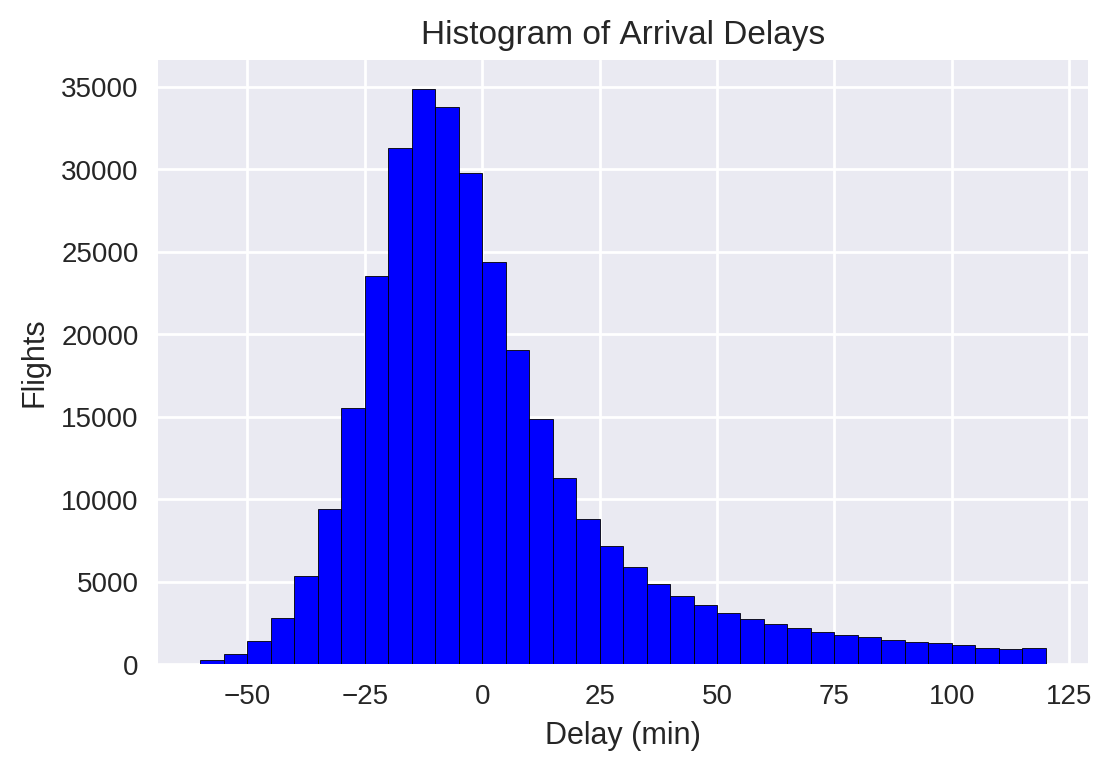

In [7]:
plt.hist(flights['arr_delay'], color = 'blue', edgecolor = 'black', bins = int(180/5))
plt.title('Histogram of Arrival Delays')
plt.xlabel('Delay (min)')
plt.ylabel('Flights')

In [8]:
flights['name'].value_counts()

United Air Lines Inc.          56359
JetBlue Airways                52267
ExpressJet Airlines Inc.       48641
Delta Air Lines Inc.           46468
American Airlines Inc.         31197
Envoy Air                      24327
US Airways Inc.                19547
Endeavor Air Inc.              16578
Southwest Airlines Co.         11588
Virgin America                  4920
AirTran Airways Corporation     3021
Alaska Airlines Inc.             689
Frontier Airlines Inc.           639
Mesa Airlines Inc.               513
Hawaiian Airlines Inc.           332
SkyWest Airlines Inc.             27
Name: name, dtype: int64

# Homework Part 1

In [20]:
grouped_flights = flights.groupby(['name'])

grouped_flights_df = grouped_flights['arr_delay'].describe().reset_index()
grouped_flights_df.sort_values('mean', ascending=1, inplace=True)

#grouped_flights_df = grouped_flights.agg({'arr_delay': ['size', 'mean', 'std', 'var', 'min', 'max']}).reset_index()
#grouped_flights_df.columns = ['name', 'count', 'mean', 'std', 'var', 'min', 'max']
#grouped_flights_df.sort_values('mean', ascending=1, inplace=True)

grouped_flights_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 1 to 0
Data columns (total 9 columns):
name     16 non-null object
count    16 non-null float64
mean     16 non-null float64
std      16 non-null float64
min      16 non-null float64
25%      16 non-null float64
50%      16 non-null float64
75%      16 non-null float64
max      16 non-null float64
dtypes: float64(8), object(1)
memory usage: 1.2+ KB


In [21]:
grouped_flights_df

,name,count,mean,std,min,25%,50%,75%,max
1,Alaska Airlines Inc.,689.0,-11.878084,29.566533,-60.0,-31.0,-18.0,1.0,119.0
8,Hawaiian Airlines Inc.,332.0,-11.608434,23.604822,-60.0,-27.0,-13.0,2.0,83.0
15,Virgin America,4920.0,-5.178252,28.641181,-60.0,-23.0,-10.0,5.0,120.0
2,American Airlines Inc.,31197.0,-3.985960,28.257029,-60.0,-22.0,-10.0,6.0,120.0
3,Delta Air Lines Inc.,46468.0,-3.246191,26.723283,-60.0,-20.0,-9.0,6.0,120.0
14,United Air Lines Inc.,56359.0,-0.805461,28.096723,-60.0,-19.0,-7.0,10.0,120.0
13,US Airways Inc.,19547.0,-0.471070,23.943063,-60.0,-15.0,-6.0,7.0,120.0
4,Endeavor Air Inc.,16578.0,-0.261913,31.999876,-60.0,-21.0,-9.0,11.0,120.0
11,SkyWest Airlines Inc.,27.0,1.814815,31.552200,-26.0,-16.0,-8.0,3.0,107.0
12,Southwest Airlines Co.,11588.0,2.522351,28.084498,-58.0,-15.0,-4.0,12.0,120.0


In [0]:
top_by_mean = grouped_flights_df.loc[ grouped_flights_df['mean'] < 0 ]

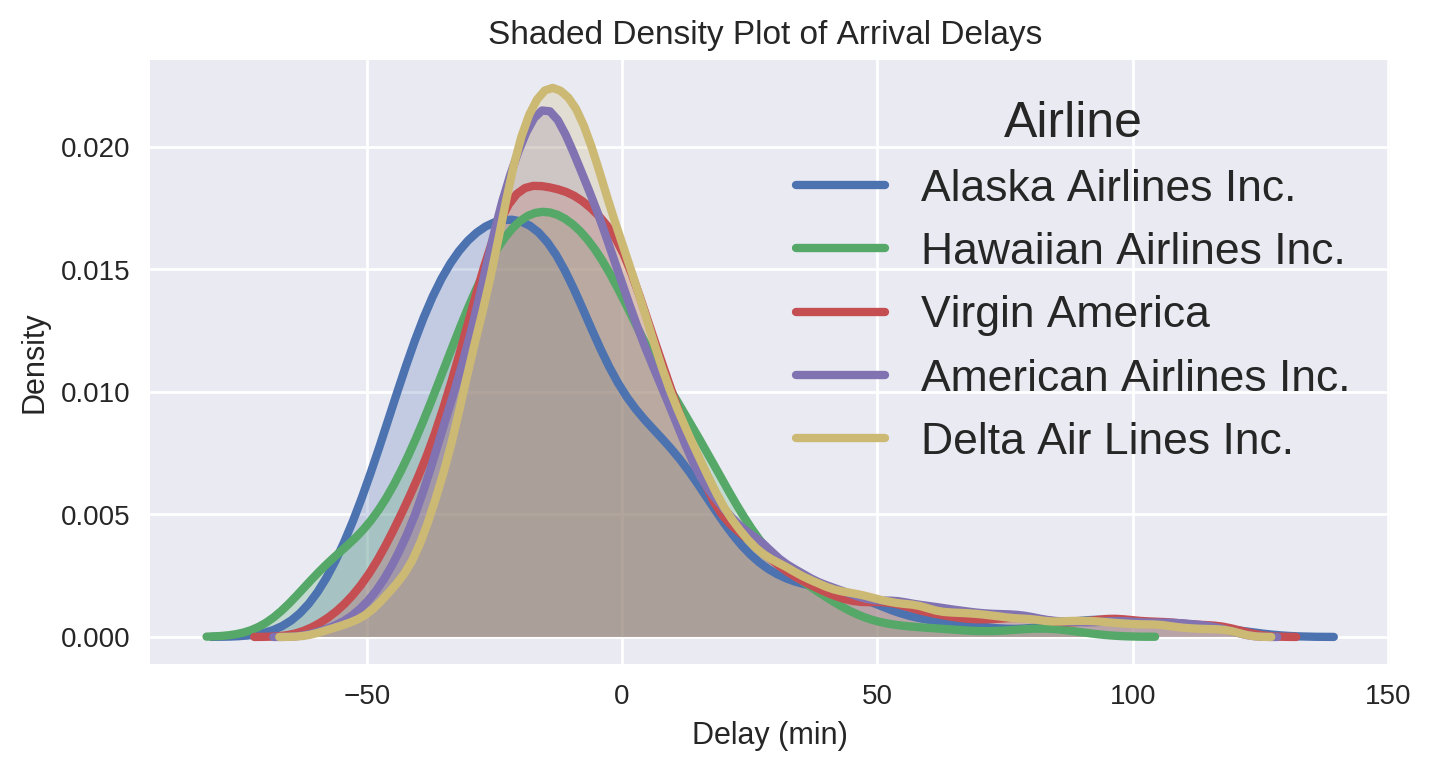

In [27]:
figsize(8, 4)

for airline in top_by_mean[:5]['name']:
    subset = flights[flights['name'] == airline]
    
    sns.distplot(subset['arr_delay'], hist=False, kde=True, rug=False,
                 kde_kws = {'shade': True, 'linewidth': 3},
                 rug_kws={'color': 'black'},
                 label = airline)
    
plt.legend(prop={'size': 16}, title = 'Airline')
plt.title('Shaded Density Plot of Arrival Delays '); 
plt.xlabel('Delay (min)'); plt.ylabel('Density');

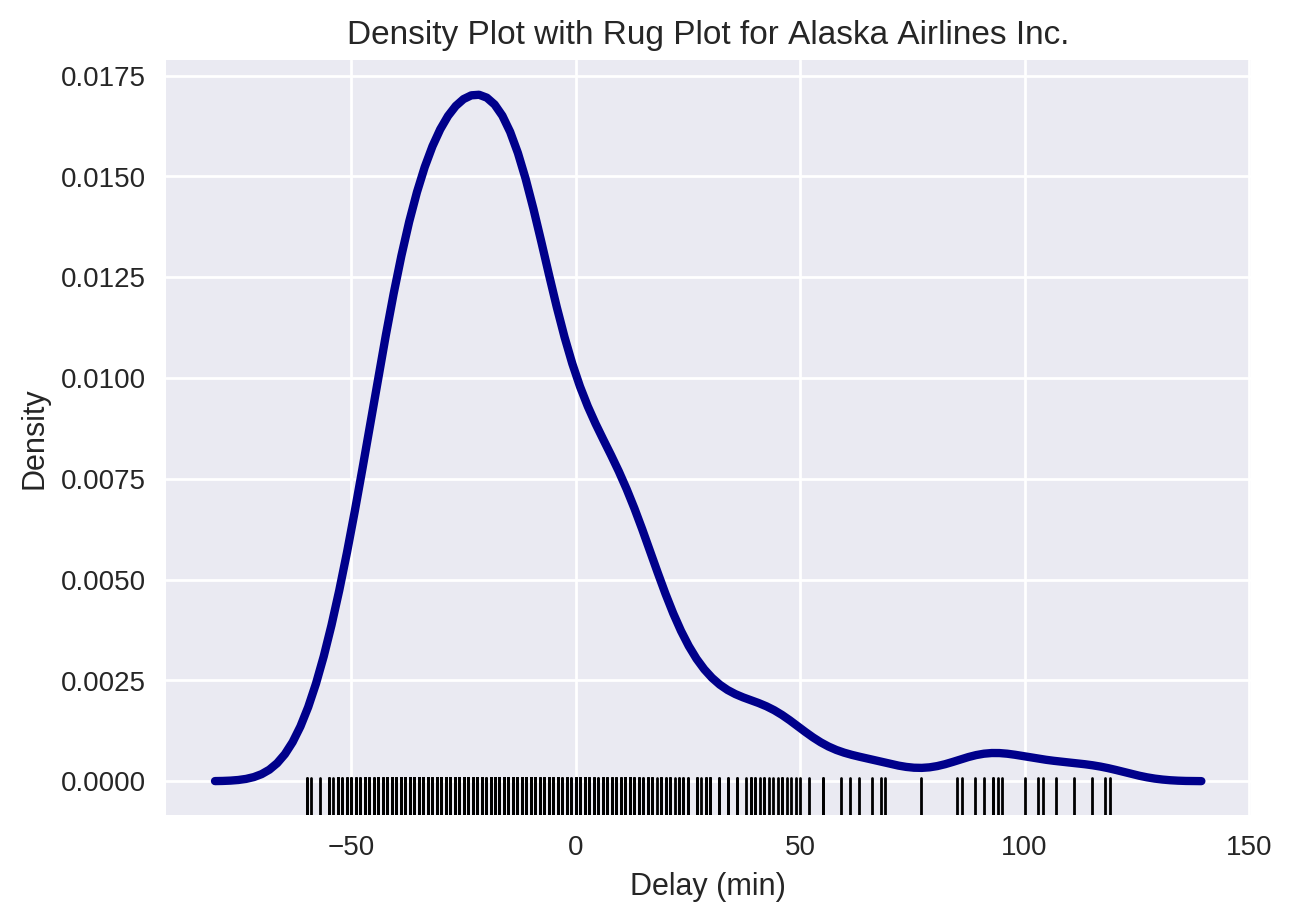

In [173]:
top_name = top_by_mean[:1]['name'][1]

# Subset
subset = flights[ flights['name'] == top_name ]

# Density Plot with Rug Plot
sns.distplot(subset['arr_delay'], hist = False, kde = True, rug = True,
             color = 'darkblue', 
             kde_kws={'linewidth': 3},
             rug_kws={'color': 'black'})

# Plot formatting
plt.title('Density Plot with Rug Plot for ' + top_name);
plt.xlabel('Delay (min)'); plt.ylabel('Density');

In [72]:
from scipy import stats

for index in np.arange(5):
  dist1 = flights[ flights['name'] == top_by_mean.iloc[0]['name'] ]
  dist2 = flights[ flights['name'] == top_by_mean.iloc[index+1]['name'] ]
  
  t2, p2 = stats.ttest_ind(dist1['arr_delay'], dist2['arr_delay'])
  emd_dist = stats.wasserstein_distance(dist1['arr_delay'], dist2['arr_delay'])
  
  print("Between 0 and " + str(index+1) + " - emd=" + str(emd_dist) + " | t=" + str(t2) + " | p=" + str(2*p2))

Between 0 and 1 - emd=5.139166244076451 | t=-0.14533830185560542 | p=1.7689450353170428
Between 0 and 2 - emd=6.713329970382433 | t=-5.727695624409466 | p=2.141933542784452e-08
Between 0 and 3 - emd=7.9791948101890835 | t=-7.244184693123898 | p=8.897936073157596e-13
Between 0 and 4 - emd=8.849732693678863 | t=-8.402739328849828 | p=8.963707552849455e-17
Between 0 and 5 - emd=11.192272836451144 | t=-10.275072132942741 | p=1.9185609879454983e-24


# **Homework Part 1 - Answer**

Top 5 performing are Alaska, Hawaiian, Virgin, American and Delta.

Alaska and Hawaiian have < 1000 data points, and Virgin < 5000 data points.

**American has > 30k data points, so that seems more trustworthy.**


---


Alaska has the best mean arrival delay of -11.8 minutes, std dev of 29.5, and has a top 25% with -31 minutes.

However, there are only 689 flights for Alaska.


---


Hawaiian has the 2nd best mean delay of -11.6 minutes, a better std dev of 23, and a 2nd best 25% with -27 minutes.

Even worse though, there are only 332 flights for Hawaiian.

---

Both Virgin and American has similar means of -5 and -3, similar std dev of -28 minutes, and 25% with -23 and -22.

Virgin has 4920 flights.

American has 31197 flights.


---


Delta and United then have another 10k and 20k more flights than American.

